In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skimage
import cv2 

In [3]:
img = cv2.imread('Images/regular/Dark_Hole/53129443.jpg')

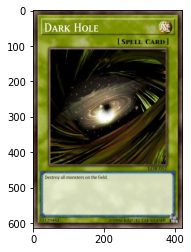

In [4]:
plt.imshow(img)

In [5]:
import skimage.segmentation as seg


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


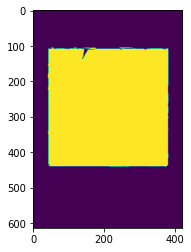

In [6]:
img_slice = seg.slic(img, n_segments=2)
plt.imshow(img_slice)

In [9]:
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

print('reading image')
im = Image.open('Images/regular/Dark_Hole/53129443.jpg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

reading image
finding clusters
cluster centres:
 [[185.63821034 221.02339933 215.26124968]
 [  6.52559181  13.82133717  17.03630838]
 [ 19.56417399 141.41911292 124.496036  ]
 [ 34.4018437   64.35344647  72.50492353]
 [ 99.55224392 128.78828366 130.79033916]]
most frequent is [ 6.52559181 13.82133717 17.03630838] (#060d11)


/tmp/ipykernel_993/3509547961.py:16: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead
  ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)
/tmp/ipykernel_993/3509547961.py:23: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences
/tmp/ipykernel_993/3509547961.py:25: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  index_max = scipy.argmax(counts)                    # find most frequent


In [1]:
import faiss

In [25]:
import json

In [26]:
x = json.loads('/mnt/c/Users/nmagh/Downloads/labels_my-project-name_2022-09-15-01-03-31.json')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [27]:
import pandas as pd
annotations = pd.read_json('/mnt/c/Users/nmagh/Downloads/labels_my-project-name_2022-09-15-01-02-34.json')

In [28]:
annotations

,IMG20220915124151.jpg,IMG20220915124154.jpg,IMG20220915124157.jpg,IMG20220915124200.jpg,IMG20220915124203.jpg,IMG20220915124206.jpg,IMG20220915124224.jpg,IMG20220915124228.jpg,IMG20220915124230.jpg,IMG20220915124232.jpg,...,IMG20220915124518.jpg,IMG20220915124520.jpg,IMG20220915124522.jpg,IMG20220915124524.jpg,IMG20220915124527.jpg,IMG20220915124529.jpg,IMG20220915124531.jpg,IMG20220915124533.jpg,IMG20220915124535.jpg,IMG20220915124537.jpg
fileref,,,,,,,,,,,...,,,,,,,,,,
size,3476736,3802068,3270416,2626469,3348782,3603891,3708398,3112773,3181846,3600289,...,3091372,2800186,3391308,2805388,3311395,2603381,2875860,3040635,2767064,2886783
filename,IMG20220915124151.jpg,IMG20220915124154.jpg,IMG20220915124157.jpg,IMG20220915124200.jpg,IMG20220915124203.jpg,IMG20220915124206.jpg,IMG20220915124224.jpg,IMG20220915124228.jpg,IMG20220915124230.jpg,IMG20220915124232.jpg,...,IMG20220915124518.jpg,IMG20220915124520.jpg,IMG20220915124522.jpg,IMG20220915124524.jpg,IMG20220915124527.jpg,IMG20220915124529.jpg,IMG20220915124531.jpg,IMG20220915124533.jpg,IMG20220915124535.jpg,IMG20220915124537.jpg
base64_img_data,,,,,,,,,,,...,,,,,,,,,,
file_attributes,{},{},{},{},{},{},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{}
regions,"{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...",...,"{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',...","{'0': {'shape_attributes': {'name': 'polygon',..."


In [29]:
inputs = annotations.loc['regions']
def pull_rect(x):
    x_data = x['0']['shape_attributes']['all_points_x']
    y_data = x['0']['shape_attributes']['all_points_y']
    x_min, x_max = min(x_data), max(x_data)
    y_min, y_max = min(y_data), max(y_data)
    return [x_min, y_min, x_max,  y_max]



In [30]:
root_img_path = '/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/'

In [31]:
inputs = pd.DataFrame(inputs).reset_index().rename(columns={'index': 'image_file'})
inputs['points'] = inputs['regions'].apply(lambda x: pull_rect(x))


In [98]:
def extract(record):
    
    path = root_img_path + record['image_file']
    path = path + ' ' + str(int(record['points'][0]))+',' + str(int(record['points'][1])) + ',' + str(int(record['points'][2])) + ',' + str(int(record['points'][3])) + "," +str(1)
    return path
    

In [32]:
annotations['IMG20220915124338.jpg'].loc['regions']

{'0': {'shape_attributes': {'name': 'polygon',
   'all_points_x': [1211.4045534150614,
    3557.099824868652,
    2736.6444833625224,
    318.3187390542906,
    1211.4045534150614],
   'all_points_y': [158.71103327495624,
    1449.919439579685,
    3018.1996497373034,
    1805.0017513134853,
    158.71103327495624]},
  'region_attributes': {'label': 'Card'}}}

In [99]:
inputs.apply(extract,1).tolist()

['/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124151.jpg 610,968,2378,3557,1',
 '/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124154.jpg 488,620,2188,3102,1',
 '/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124157.jpg 607,954,2188,3285,1',
 '/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124200.jpg 442,753,2386,3534,1',
 '/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124203.jpg 560,853,2820,4096,1',
 '/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124206.jpg 531,473,2683,3590,1',
 '/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124224.jpg 302,931,2670,3180,1',
 '/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124228.jpg 253,1001,2877,3520,1',
 '/mnt/c/Users/nmagh/Downloads/Ygotrain

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

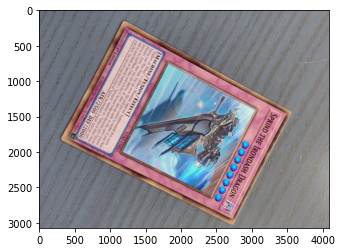

In [2]:
plt.imshow(cv2.imread('/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124338.jpg'))
img = cv2.imread('/mnt/c/Users/nmagh/Downloads/Ygotraining-20220915T194952Z-001/Ygotraining/IMG20220915124338.jpg')

In [3]:
pts = inputs.apply(lambda x: pull_rect(x))
pts[0]

NameError: name 'inputs' is not defined

In [4]:
# isClosed = True
# import numpy as np
 
# # Blue color in BGR
# color = (255, 0, 0)
 
# # Line thickness of 2 px
# thickness = 2
# cv2.polylines(img, np.array(pts[0]).astype('int32'), isClosed=True, color=(255, 0, 0))
,

''

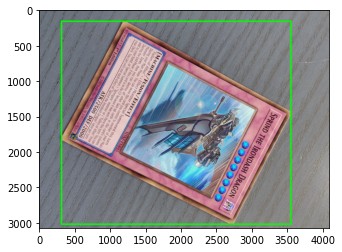

In [5]:
plt.imshow(cv2.rectangle(img, (318,158),(3557,3018), (0,255,0),thickness=20))

In [93]:
cv2.polylines(img, )

In [33]:
x =  [1211.4045534150614,
    3557.099824868652,
    2736.6444833625224,
    318.3187390542906,
    1211.4045534150614]
y = [158.71103327495624,
    1449.919439579685,
    3018.1996497373034,
    1805.0017513134853,
    158.71103327495624]

In [34]:
pairs = []
for i in range(len(x)): 
    pairs.append(np.array(np.array([int(x[i]), int(y[i])])))
pairs = np.stack(pairs)

In [35]:
pts = np.array([[25, 70], [25, 160],
                [110, 200], [200, 160],
                [200, 70], [110, 20]],
               np.int32)

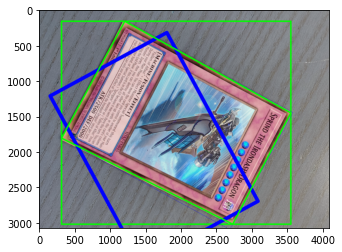

In [38]:
plt.imshow(cv2.polylines(img, [pairs],
                      True, (0,255,0), 20))

In [44]:
all(value == 0 for value in {1:2, 3:4}.values())

False

In [43]:
all({1: 2, 3: 4}.values() == 0)

TypeError: 'bool' object is not iterable

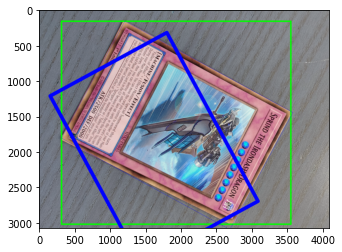

In [23]:
rect = cv2.minAreaRect(pairs)
box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
box = np.int0(box)
plt.imshow(cv2.drawContours(img,[box],0,(0,0,255),50))


In [19]:
rect

((1952.9609375, 1625.88134765625),
 (1873.514892578125, 2703.82421875),
 -61.53354263305664)